# AOTY 2017
This has been adapted from the 2018 calculations. See that workbook for more information.

### Setting up the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

### Importing the data

In [2]:
df = pd.read_excel('AOTY.xlsx', sheet_name='Albums')\
       .drop('TOTAL', axis=1)\
       .reset_index()\
       .rename(columns={'index': 'Artist'})\
       .dropna(axis=0, subset=['Artist'])\
       .dropna(axis=1, how='all')\
       .dropna(axis=0, how='all')\
       .fillna(0)\
       .groupby('Artist').sum()

df = df[sorted(df.columns)]
df['Total'] = df.sum(axis=1, numeric_only=True)
df['Inclusions'] = df[[c for c in df.columns if c != 'Total']].astype(bool).sum(axis=1)

### Getting the Top 20

In [3]:
top_20 = df.sort_values(by='Total', ascending=False)[:20]

### Total Scores

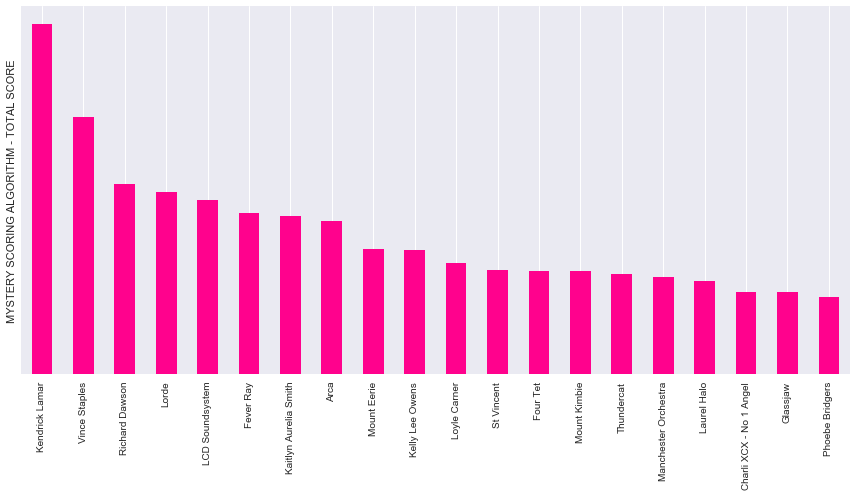

In [4]:
ax = top_20.plot.bar(y='Total', legend=False, figsize=(12,7), color='xkcd:hot pink')
ax.set(yticks=[], ylabel='MYSTERY SCORING ALGORITHM - TOTAL SCORE', xlabel='')
plt.tight_layout()

### Score Distributions

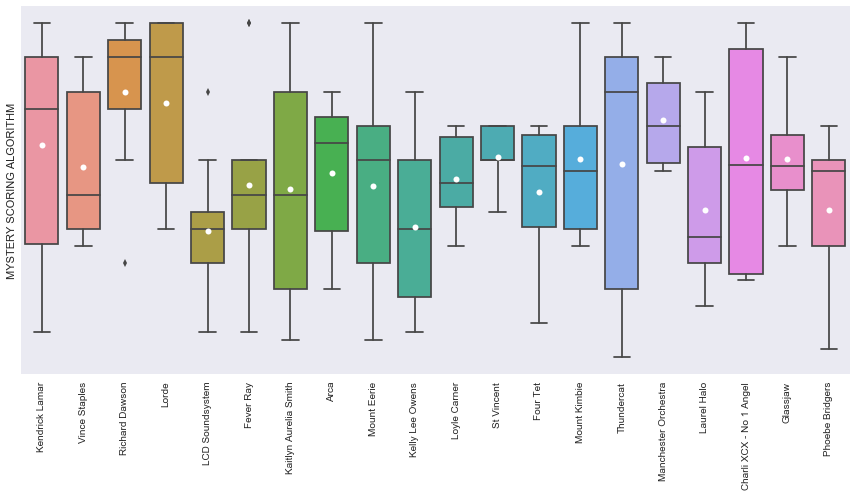

In [5]:
pvt = top_20.drop(['Total', 'Inclusions'], axis=1).stack().reset_index()
pvt.columns = ['Artist', 'Reviewer', 'Score']
pvt = pvt[(pvt['Score'] > 0)]

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(x=pvt['Artist'], y=pvt['Score'], showmeans=True,
                meanprops=dict(marker='o', markerfacecolor='white'))
ax.set(yticks=[], ylabel='MYSTERY SCORING ALGORITHM', xlabel='')
plt.xticks(rotation=90)
plt.tight_layout()

### Similar Tastes

In [6]:
person_corr = df.drop(['Total', 'Inclusions'], axis=1).corr()

# Name the index and columns - it'll help later
person_corr.index.name = 'Person 1'
person_corr.columns.name = 'Person 2'

person_results = person_corr.mask(np.tril(np.ones(person_corr.shape)).astype(bool)).stack()

person_results.name = 'Correlation'
person_results = person_results.reset_index()\
                               .sort_values(by='Correlation', ascending=False)\
                               .reset_index(drop=True)\
                               .head(10)
person_results

,Person 1,Person 2,Correlation
0,Sam R,Sarge,0.750854
1,J Carr,Sarge,0.570242
2,Charlotte,Nat,0.488750
3,J Carr,Sam R,0.482405
4,Chris B,James B,0.431828
5,Nat,Rob G,0.386250
6,Benny,Chris B,0.384542
7,J Carr,James B,0.381549
8,Chris B,J Carr,0.366885
9,Bethan,Sean,0.360625


### Similar Albums

In [7]:
album_corr = df[df['Inclusions'] > 3].drop(['Total', 'Inclusions'], axis=1).transpose().corr()

# Name the index and columns - it'll help later
album_corr.index.name = 'Album 1'
album_corr.columns.name = 'Album 2'

album_results = album_corr.mask(np.tril(np.ones(album_corr.shape)).astype(bool)).stack()

album_results.name = 'Correlation'
album_results = album_results.reset_index()\
                             .sort_values(by='Correlation', ascending=False)\
                             .reset_index(drop=True)\
                             .head(10)
album_results

,Album 1,Album 2,Correlation
0,St Vincent,Stormzy,0.816273
1,Karen Gwyer,Yves Tumor,0.789831
2,Phoebe Bridgers,Sorority Noise,0.765860
3,Jlin,Lee Gamble,0.692018
4,Manchester Orchestra,Phoebe Bridgers,0.686841
5,Charli XCX - No 1 Angel,Stormzy,0.684701
6,John Maus,Priests,0.666208
7,Manchester Orchestra,Sorority Noise,0.665242
8,Kaitlyn Aurelia Smith,Vince Staples,0.617275
9,Arca,John Maus,0.604795
